In [68]:
from requests import get
from configparser import ConfigParser
from DotaApiWrapper import DotaAPIWrapper
from shutil import copyfileobj
import multiprocessing as mp
from pathlib import Path
from itertools import repeat
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL

In [ ]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20

In [48]:
home = Path(os.getcwd()).resolve()
config = ConfigParser()
config.read(Path(home.parent.resolve(), "Web.config"))
config["SECRETS"]["api_key"]
api = DotaAPIWrapper(config["SECRETS"]["api_key"])

In [4]:
r = api.get_hero_matchups(1)

In [12]:
results = r.json()

In [43]:
heroes = {hero["id"]:hero for hero in api.get_heroes().json()}

In [53]:
results

[{'hero_id': 86, 'games_played': 256, 'wins': 108},
 {'hero_id': 94, 'games_played': 194, 'wins': 95},
 {'hero_id': 85, 'games_played': 172, 'wins': 70},
 {'hero_id': 10, 'games_played': 139, 'wins': 70},
 {'hero_id': 87, 'games_played': 124, 'wins': 59},
 {'hero_id': 5, 'games_played': 124, 'wins': 53},
 {'hero_id': 106, 'games_played': 121, 'wins': 55},
 {'hero_id': 128, 'games_played': 118, 'wins': 63},
 {'hero_id': 101, 'games_played': 117, 'wins': 61},
 {'hero_id': 104, 'games_played': 114, 'wins': 53},
 {'hero_id': 71, 'games_played': 114, 'wins': 46},
 {'hero_id': 17, 'games_played': 108, 'wins': 44},
 {'hero_id': 69, 'games_played': 106, 'wins': 50},
 {'hero_id': 100, 'games_played': 102, 'wins': 54},
 {'hero_id': 51, 'games_played': 99, 'wins': 55},
 {'hero_id': 19, 'games_played': 95, 'wins': 49},
 {'hero_id': 120, 'games_played': 90, 'wins': 42},
 {'hero_id': 43, 'games_played': 90, 'wins': 52},
 {'hero_id': 38, 'games_played': 87, 'wins': 32},
 {'hero_id': 9, 'games_played'

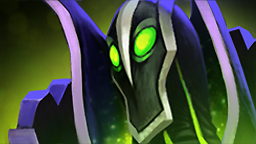

In [66]:
for res in results:
    file = Path(home,"assetts","images",f"{heroes[res['hero_id']]['localized_name']}.png")
    display(Image(filename=file, height=50, width=50))
    break

In [84]:
len(heroes)

124

In [118]:
results

[{'hero_id': 86, 'games_played': 256, 'wins': 108},
 {'hero_id': 94, 'games_played': 194, 'wins': 95},
 {'hero_id': 85, 'games_played': 172, 'wins': 70},
 {'hero_id': 10, 'games_played': 139, 'wins': 70},
 {'hero_id': 87, 'games_played': 124, 'wins': 59},
 {'hero_id': 5, 'games_played': 124, 'wins': 53},
 {'hero_id': 106, 'games_played': 121, 'wins': 55},
 {'hero_id': 128, 'games_played': 118, 'wins': 63},
 {'hero_id': 101, 'games_played': 117, 'wins': 61},
 {'hero_id': 104, 'games_played': 114, 'wins': 53},
 {'hero_id': 71, 'games_played': 114, 'wins': 46},
 {'hero_id': 17, 'games_played': 108, 'wins': 44},
 {'hero_id': 69, 'games_played': 106, 'wins': 50},
 {'hero_id': 100, 'games_played': 102, 'wins': 54},
 {'hero_id': 51, 'games_played': 99, 'wins': 55},
 {'hero_id': 19, 'games_played': 95, 'wins': 49},
 {'hero_id': 120, 'games_played': 90, 'wins': 42},
 {'hero_id': 43, 'games_played': 90, 'wins': 52},
 {'hero_id': 38, 'games_played': 87, 'wins': 32},
 {'hero_id': 9, 'games_played'

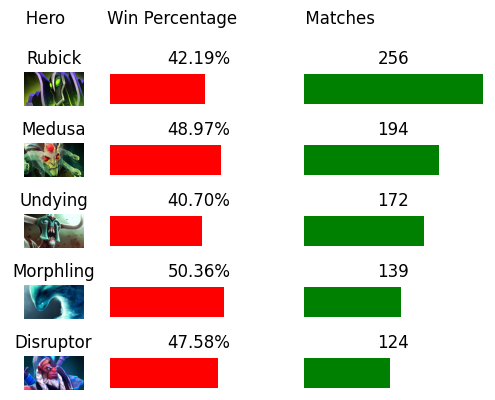

In [185]:
# def plot_top_5_matchups(hero_id: int)
xlim_games = max([res["games_played"] for res in results])
xlim_win_perc = max([1/res["games_played"]*res["wins"] for res in results])*100
lim = 5
fig = plt.figure(figsize=(5, 100*(lim/len(heroes))))
plt.suptitle("   Hero        Win Percentage             Matches                     ")
for idx,res in enumerate(results):
    file = Path(home,"assetts","images",f"{heroes[res['hero_id']]['localized_name']}.png")
    plot_img = plt.subplot2grid((lim,5), (idx,0), colspan=1, fig=fig)
    plot_img.imshow(np.asarray(PIL.Image.open(file)))
    plot_img.set_title(heroes[res['hero_id']]['localized_name'])
    plot_img.set_axis_off()
    matches_bar = plt.subplot2grid((lim,5), (idx,3), colspan=2, fig=fig)
    matches_bar.barh(0, res["games_played"], color="green")
    matches_bar.set_xlim(xmax=xlim_games)
    matches_bar.set_title(res["games_played"])
    matches_bar.set_axis_off()
    win_perc_bar = plt.subplot2grid((lim,5), (idx,1), colspan=2, fig=fig)
    win_perc_bar.barh(0, 1/res["games_played"]*res["wins"]*100, color="red")
    win_perc_bar.set_xlim(xmax=xlim_win_perc)
    win_perc_bar.set_title(f'{1/res["games_played"]*res["wins"]:.2%}')
    win_perc_bar.set_axis_off()
    if idx==lim-1:
        break
plt.tight_layout()



In [42]:
heroes[23]

{'id': 25,
 'name': 'npc_dota_hero_lina',
 'localized_name': 'Lina',
 'primary_attr': 'int',
 'attack_type': 'Ranged',
 'roles': ['Support', 'Carry', 'Nuker', 'Disabler'],
 'legs': 2}